In [62]:
path = r'C:/Users/ruw/Desktop'
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, rf'{path}\RA\penicilin\Libaries')

In [63]:
import reload_lib as rl
import life_cycle_assessment as lc
import lcia_results as lr
import standards as s
import database_manipulation as dm
import results_figures as rfig
import sensitivity as st
import lca
lib = [rl, lc, lr, dm, s, rfig, lca, st]

rl.reload_lib(lib)

In [64]:
from lca import LCA


In [65]:
matching_database = "ev391cutoff"
lcia_method='recipe'
bw_project="Penicillin"
database = "penicillin_cut_off"

In [66]:
set_up = LCA(path, matching_database, database)

You selected to not reload
Initialization is completed for penicillin_cut_off


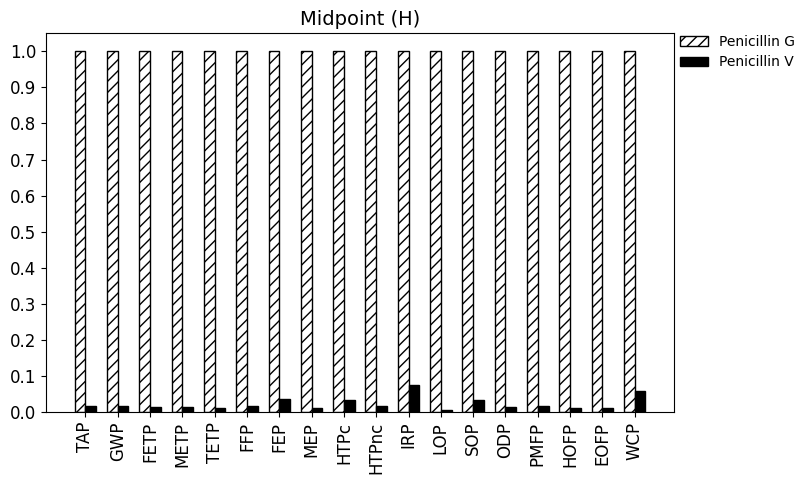

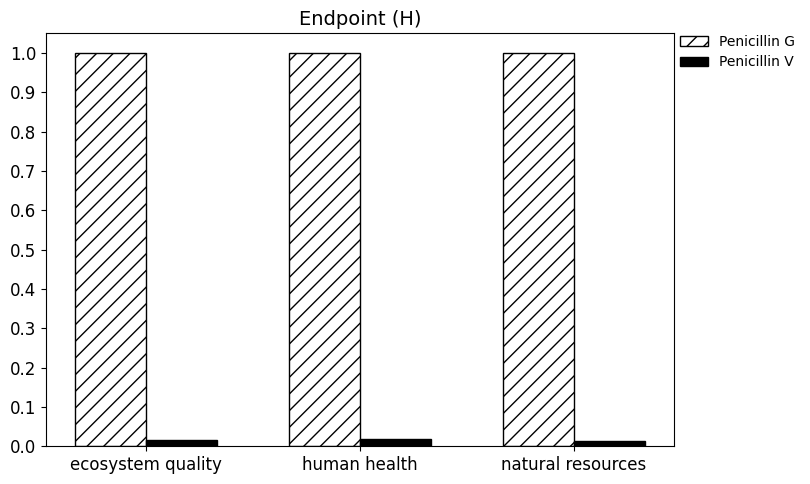

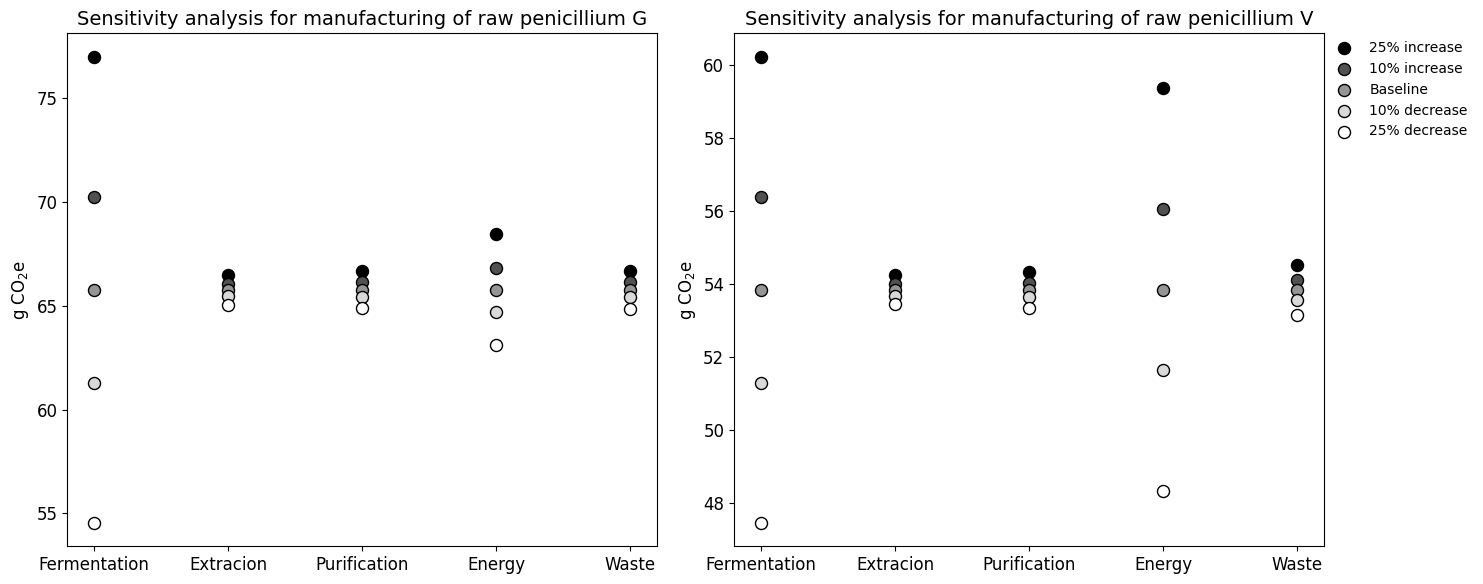

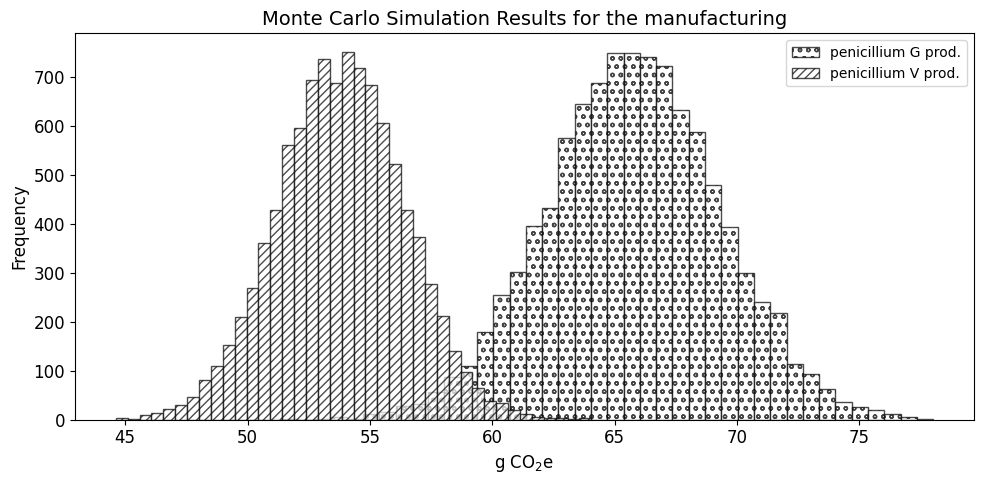

T-value: 271.1212060793612, P-value: 0.0


In [68]:
rl.reload_lib(lib)

data = rfig.create_results_figures(path, matching_database, database, lcia_method, bw_project) # Calculating the results and creating the figures
st.perform_sens_uncert_analysis(set_up.system_path, set_up.db, mc_base=10, mc_power=4, calc=False)

In [ ]:
def save_total_impact():
    path_pen = r"C:\Users\ruw\Desktop\RA\penicilin\results\LCIA\LCIA_results.xlsx"
    method = set_up.lcia_impact_method()
    df = s.import_LCIA_results(path_pen, method)
    
    df_tot, _ = lc.dataframe_element_scaling(df)
    df_tot_T = df_tot.T

    method_updated = []

    for m in method:
        method_updated.append(m[1:])

    df_tot_T.index = method_updated
    df_tot_T
    file_path_tot = r"C:\Users\ruw\Desktop\RA\penicilin\results\LCIA\penincillium_totals.xlsx"
    s.save_LCIA_results(df_tot_T, file_path_tot, "totals")

In [72]:
save_total_impact()